<a href="https://colab.research.google.com/github/mhdindramahfuzak/DL_prediksi_demensia/blob/main/PrediksiTumorOtak_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Perbaikan tanda sama dengan
import matplotlib.pyplot as plt
import io
from google.colab import files

##1. Import Data

In [ ]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        try:
            img = Image.open(img_path)
            img = img.resize((224, 224))  # Perbaikan: img = img.resize
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except Exception as e:
            print(f"Gagal memuat {filename}: {e}")
    return images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tumor_images = load_images('/content/drive/MyDrive/DL/gambarMRI/positif')
no_tumor_images = load_images('/content/drive/MyDrive/DL/gambarMRI/negatif')

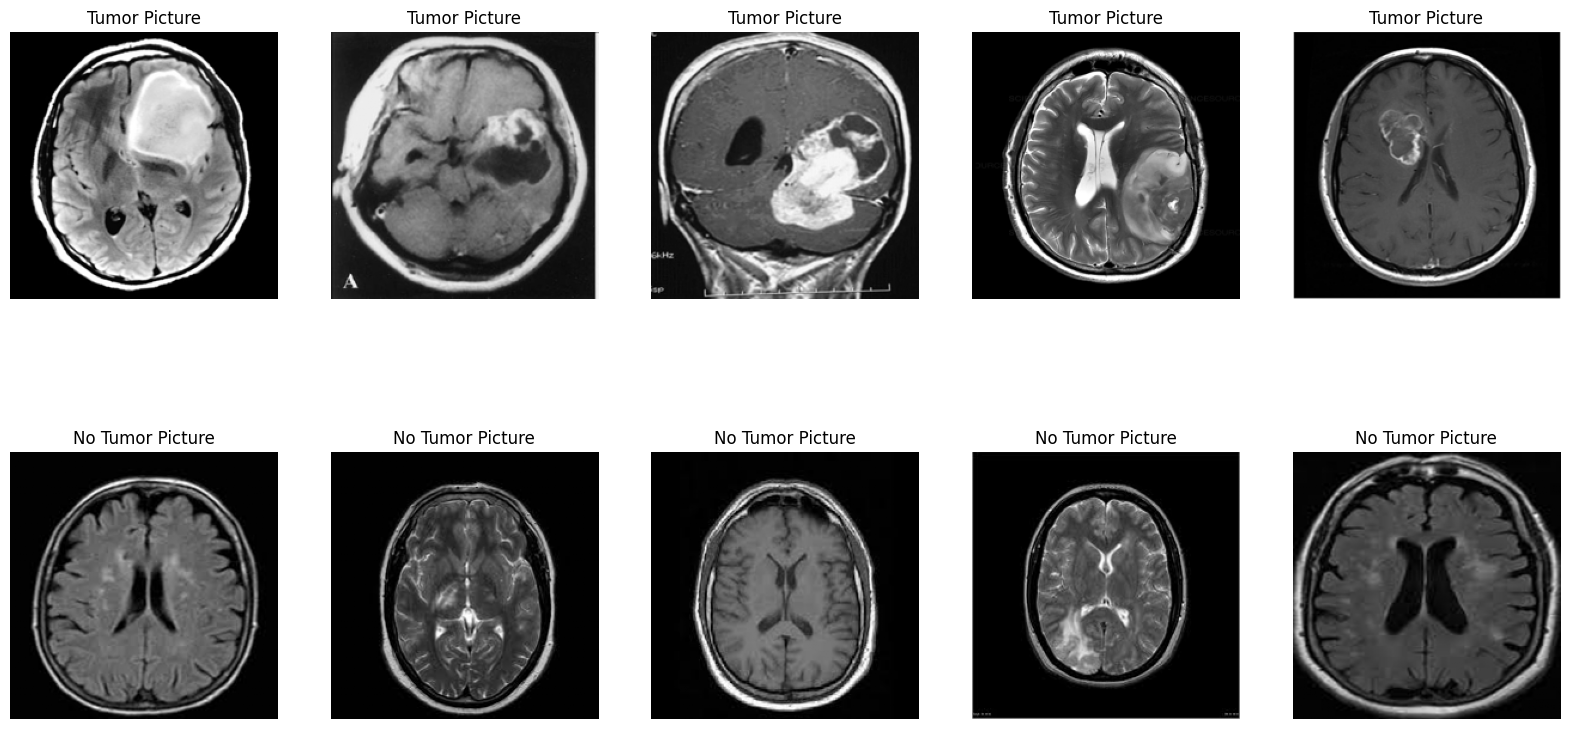

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Menampilkan gambar tumor
for i in range(5):
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor Picture')
    axes[0, i].axis('off')

# Menampilkan gambar normal (tanpa tumor)
for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])  # gunakan normal_images sesuai definisi sebelumnya
    axes[1, i].set_title('No Tumor Picture')
    axes[1, i].axis('off')

plt.show()


In [ ]:
type(tumor_images)

list

In [ ]:
len(tumor_images)

155

In [ ]:
len(no_tumor_images)

196

In [ ]:
tumor_images

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.12156863, 0.12156863, 0.12156863],
        

##2. Pelabelan

In [ ]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels

tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [ ]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(tumor_labels)

numpy.ndarray

In [ ]:
type(no_tumor_labels)

numpy.ndarray

In [ ]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [ ]:
data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.12156863, 0.12156863, 0.12156863],
        

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
data[0].shape

(224, 224, 3)

##3. Spliting Data



In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Konversi ke TensorFlow Dataset
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

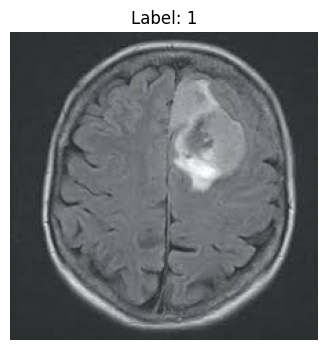

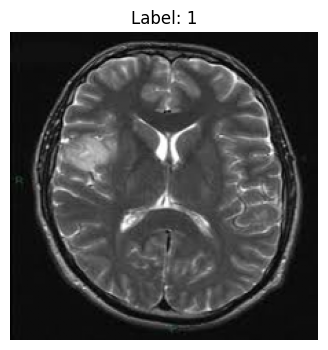

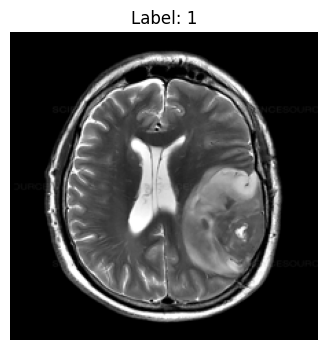

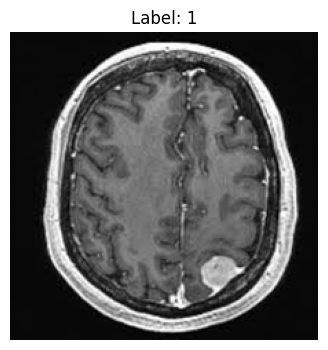

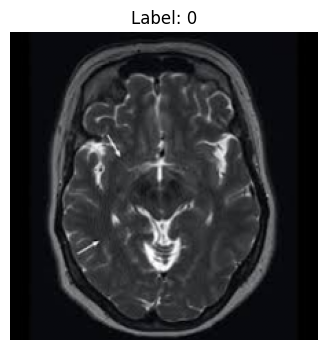

In [ ]:
for image, label in train.take(5):
    plt.figure(figsize=(4, 4))
    plt.imshow(image.numpy())  # Konversi tensor ke NumPy array
    plt.title('Label: {}'.format(int(label.numpy())))
    plt.axis('off')
    plt.show()


In [ ]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [ ]:
train = train.shuffle(buffer_size=1000)
val_size = int(0.1 * len(X_train))  # Ambil 10% dari X_train untuk validasi

val = train.take(val_size)
train = train.skip(val_size)


In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

##4. Training data

In [ ]:
model = Sequential()

# Convolutional layer pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='valid'))

# MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer untuk menurunkan dimensi data
model.add(Flatten())

# Dense layer pertama
model.add(Dense(256, activation='relu'))

# Dropout untuk mencegah overfitting
model.add(Dropout(0.5))

# Output layer untuk klasifikasi biner (tumor vs non-tumor)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train,
                    validation_data=val,
                    epochs=200,
                    verbose =1)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 3.0815e-05 - val_accuracy: 1.0000 - val_loss: 8.2564e-07
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 2.3011e-05 - val_accuracy: 1.0000 - val_loss: 5.0860e-07
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 6.5879e-06 - val_accuracy: 1.0000 - val_loss: 5.0035e-07
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 8.9856e-06 - val_accuracy: 1.0000 - val_loss: 2.9983e-07
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.0000 - loss: 3.5261e-06 - val_accuracy: 1.0000 - val_loss: 5.7901e-07
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 2.4325e-05 - val_accuracy: 1.0000 - val_loss: 2.3314e-07
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 1.1018e-05 - val_accuracy: 1.0000 - val_loss: 6.8702e-07
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train, epochs=100, validation_data=val)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 3.0556e-07 - val_accuracy: 1.0000 - val_loss: 1.7338e-08
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 4.4584e-07 - val_accuracy: 1.0000 - val_loss: 3.2192e-08
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 3.2931e-06 - val_accuracy: 1.0000 - val_loss: 2.9476e-08
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 9.6138e-06 - val_accuracy: 1.0000 - val_loss: 2.7015e-08
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 6.6812e-07 - val_accuracy: 1.0000 - val_loss: 2.9678e-08
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 5.3121e-07 - val_accuracy: 1.0000 - val_loss: 3.9227e-08
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 4.8990e-06 - val_accuracy: 1.0000 - val_loss: 8.8187e-09
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)

In [ ]:
# Ubah nama model agar sesuai
model_1 = model

# Evaluasi model di data training
train_loss, train_acc = model_1.evaluate(X_train, y_train, verbose=0)

# Evaluasi model di data testing
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)

# Prediksi menggunakan data testing
y_pred = model_1.predict(X_test)

# Print akurasi
print('Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(train_acc * 100, test_acc * 100))

# Hitung dan tampilkan perbandingan loss
loss_diff_percent = np.round((test_loss - train_loss) * 100 / train_loss, 2)

print('Test loss is', loss_diff_percent, '% greater than Train loss' if test_loss > train_loss else '% less than Train loss')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Train Accuracy: 79.64%, Test Accuracy: 83.10%
Test loss is -6.61 % less than Train loss


In [ ]:
evulation = model.evaluate(test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8413 - loss: 0.4094


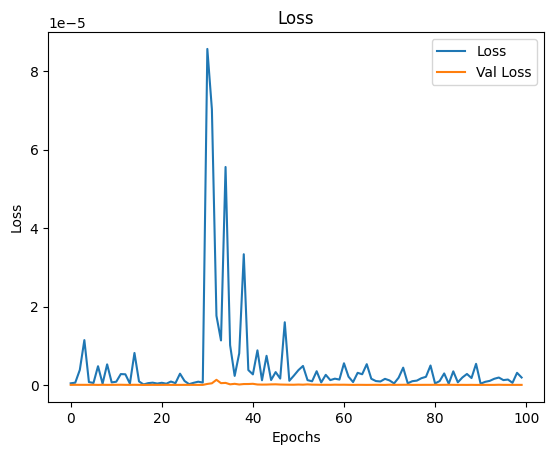

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## perbaikan akurasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan augmentasi data
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotasi gambar
    width_shift_range=0.2,  # Geser gambar secara horizontal
    height_shift_range=0.2,  # Geser gambar secara vertikal
    shear_range=0.2,  # Penggeseran bentuk gambar
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Membalik gambar secara horizontal
    fill_mode='nearest'  # Isi area kosong dengan piksel terdekat
)

# Gunakan generator untuk training data
train = datagen.flow(X_train, y_train, batch_size=32)


In [ ]:
history = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.7418 - loss: 0.5152 - val_accuracy: 0.7143 - val_loss: 0.5414
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.6645 - loss: 0.6301 - val_accuracy: 0.9643 - val_loss: 0.2677
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.7380 - loss: 0.5482 - val_accuracy: 0.7857 - val_loss: 0.5181
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.7364 - loss: 0.5630 - val_accuracy: 0.8929 - val_loss: 0.2977
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.7818 - loss: 0.5086 - val_accuracy: 0.7857 - val_loss: 0.4603
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.7998 - loss: 0.5179 - val_accuracy: 0.8214 - val_loss: 0.3486
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.7419 - loss: 0.5387 - val_accuracy: 0.7500 - val_loss: 0.3873
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.6638 - loss: 0.5737 - val_accuracy: 0.8214 - val_loss:

In [ ]:
from keras.callbacks import EarlyStopping
history = model.fit(train, epochs=100, validation_data=val)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.7310 - loss: 0.5186 - val_accuracy: 0.7857 - val_loss: 0.3668
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.7562 - loss: 0.5091 - val_accuracy: 0.7857 - val_loss: 0.4476
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 0.6898 - loss: 0.5409 - val_accuracy: 0.8214 - val_loss: 0.3782
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.8012 - loss: 0.5023 - val_accuracy: 0.8214 - val_loss: 0.4326
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - accuracy: 0.7440 - loss: 0.5339 - val_accuracy: 0.7857 - val_loss: 0.4343
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.7548 - loss: 0.5032 - val_accuracy: 0.7500 - val_loss: 0.4933
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.7262 - loss: 0.5069 - val_accuracy: 0.7857 - val_loss: 0.3837
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.7514 - loss: 0.5494 - val_accuracy: 0.6429 - v

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi dan threshold
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion Matrix:
 [[35  3]
 [ 7 26]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.88        38
         1.0       0.90      0.79      0.84        33

    accuracy                           0.86        71
   macro avg       0.86      0.85      0.86        71
weighted avg       0.86      0.86      0.86        71



In [ ]:
no_tumor_images_augmented = []

for img in no_tumor_images:
    img = np.expand_dims(img, axis=0)
    for batch in datagen.flow(img, batch_size=1):
        no_tumor_images_augmented.append(batch[0])
        if len(no_tumor_images_augmented) + len(no_tumor_images) >= len(tumor_images):
            break


In [ ]:
balanced_data = tumor_images + no_tumor_images + no_tumor_images_augmented
balanced_labels = np.concatenate([
    np.ones(len(tumor_images)),
    np.zeros(len(no_tumor_images)),
    np.zeros(len(no_tumor_images_augmented))
])

In [ ]:
# Ubah nama model agar sesuai
model_1 = model

# Evaluasi model di data training
train_loss, train_acc = model_1.evaluate(X_train, y_train, verbose=0)

# Evaluasi model di data testing
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)

# Prediksi menggunakan data testing
y_pred = model_1.predict(X_test)

# Print akurasi
print('Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(train_acc * 100, test_acc * 100))

# Hitung dan tampilkan perbandingan loss
loss_diff_percent = np.round((test_loss - train_loss) * 100 / train_loss, 2)

print('Test loss is', loss_diff_percent, '% greater than Train loss' if test_loss > train_loss else '% less than Train loss')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Train Accuracy: 81.07%, Test Accuracy: 85.92%
Test loss is -2.3 % less than Train loss


In [ ]:
evulation = model.evaluate(test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8515 - loss: 0.3742


In [ ]:
# model.save('/content/drive/MyDrive/DL/modeldeteksitumorotakV4.h5')

##5.Testing


In [ ]:

import io
from PIL import Image
import numpy as np

# Fungsi untuk memuat gambar yang diupload
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))  # Mengubah byte stream menjadi gambar
    img = img.resize((224, 224))  # Ubah ukuran gambar menjadi 224x224
    img_array = np.array(img)  # Mengubah gambar menjadi array numpy
    img_array = img_array / 255.0  # Normalisasi nilai piksel
    return img_array

# Fungsi untuk memprediksi gambar
def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)  # Memuat dan memproses gambar
    img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch
    prediction = model.predict(img_array)  # Melakukan prediksi dengan model
    if prediction[0][0] > 0.5:  # Jika hasil prediksi lebih dari 0.5, berarti tumor terdeteksi
        return "Tumor detected"
    else:  # Jika hasil prediksi kurang dari 0.5, berarti tidak ada tumor
        return "No tumor detected"


Saving 13 no.jpg to 13 no.jpg


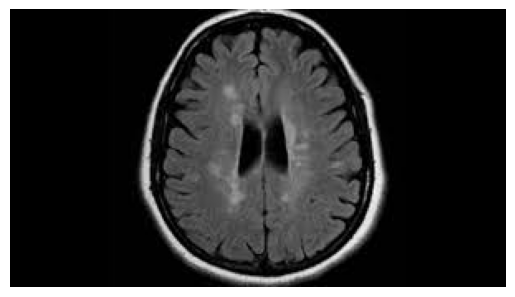

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
No tumor detected


In [ ]:
from google.colab import files
import io
from PIL import Image
import matplotlib.pyplot as plt

# Upload file gambar
uploaded = files.upload()

# Mengambil nama file yang diupload
file_name = list(uploaded.keys())[0]

# Mengambil byte dari gambar
image_bytes = uploaded[file_name]

# Menampilkan gambar
img = Image.open(io.BytesIO(image_bytes))
plt.imshow(img)
plt.axis('off')
plt.show()

# Melakukan prediksi
result = predict_image(image_bytes)
print(result)
